<center> <b> <u> <h1> KPP Communications </h1> </u> </b> </center>

<b> Company Introduction :</b> Your client for this project is a Telecom company.

They are a leading telecom company with 5 million users.They want to keep track of the number of male and female users but as the user count increases the task becomes more tedious.<br>
They want to automate the process of keeping track of male and female users using their voice.<br>
Their research and development teams are trying to understand the acoustic properties of the voice and speech so that they can use it to enhance the customer experience in their new product.<br>

<b>Current Scenario </b>
Determining a person’s gender as male or female, based upon a sample of their voice, initially seems to be an easy task.<br>
Often, the human ear can easily detect the difference between a male or a female voice within the first few spoken words.
However, designing a computer program to do this turns out to be a bit trickier.
Currently, the company is keeping track by manually entering the data for the user being male or female by listening to their voice which is a tedious task for the employees.

<b><h1>Problem Statement:</h1></b>

The current process suffers from the following problems:

The current process is a manual classification of gender using their voice.
This is very tedious and time-consuming as it needs to be repeated every time a new customer joins.

The company has hired you as a data science consultant.

They want to automate the process of predicting the male or female voice using acoustic properties of the voice or speech rather than doing this manual work.



# Dataset Description

<table>	<th>	Column Name	</th>	<th>	Description	</th>	
<tr>	<td>	Id	</td>	<td>	Unique Id	</td>	</tr>
<tr>	<td>	meanfreq	</td>	<td>	Mean frequency (in kHz) for the voice sample	</td>	</tr>
<tr>	<td>	sd	</td>	<td>	Standard deviation of the frequency	</td>	</tr>
<tr>	<td>	median	</td>	<td>	Median frequency (in kHz) for the voice sample	</td>	</tr>
<tr>	<td>	Q25	</td>	<td>	First quantile (in kHz)	</td>	</tr>
<tr>	<td>	Q75	</td>	<td>	Third quantile (in kHz)	</td>	</tr>
<tr>	<td>	IQR	</td>	<td>	Interquartile range (in kHz)	</td>	</tr>
<tr>	<td>	skew	</td>	<td>	Skewness of the voice sample	</td>	</tr>
<tr>	<td>	kurt	</td>	<td>	Kurtosis of the voice sample	</td>	</tr>
<tr>	<td>	sp.ent	</td>	<td>	Spectral entropy	</td>	</tr>
<tr>	<td>	sfm	</td>	<td>	Spectral flatness of the voice sample	</td>	</tr>
<tr>	<td>	mode	</td>	<td>	Mode frequency	</td>	</tr>
<tr>	<td>	centroid	</td>	<td>	Frequency centroid	</td>	</tr>
<tr>	<td>	peakf	</td>	<td>	Peak frequency (the frequency with the highest energy)	</td>	</tr>
<tr>	<td>	meanfun	</td>	<td>	Average of fundamental frequency measured across the acoustic signal	</td>	</tr>
<tr>	<td>	minfun	</td>	<td>	Minimum fundamental frequency measured across the acoustic signal	</td>	</tr>
<tr>	<td>	maxfun	</td>	<td>	Maximum fundamental frequency measured across the acoustic signal	</td>	</tr>
<tr>	<td>	meandom	</td>	<td>	Average of dominant frequency measured across the acoustic signal	</td>	</tr>
<tr>	<td>	mindom	</td>	<td>	Minimum of dominant frequency measured across the acoustic signal	</td>	</tr>
<tr>	<td>	maxdom	</td>	<td>	Maximum of dominant frequency measured across the acoustic signal	</td>	</tr>
<tr>	<td>	dfrange	</td>	<td>	Range of dominant frequency measured across the acoustic signal	</td>	</tr>
<tr>	<td>	modindx	</td>	<td>	Modulation index. Calculated as the accumulated absolute difference between adjacent Measurements of fundamental frequencies divided by the frequency range	</td>	</tr>
<tr>	<td>	label	</td>	<td>	The label for the voice sample (male or female)	</td>	</tr>
</table>							


In [1]:
#Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import profile_report

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [18]:
train_data = pd.read_csv('voice_train.csv')
print(train_data.shape)
train_data.head()

(2851, 22)


,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,765,0.162337,0.058206,0.174065,0.100225,0.196512,0.096287,2.127226,7.815129,0.921533,...,0.162337,0.095852,0.016754,0.235294,0.406033,0.046875,3.484375,3.437500,0.155348,male
1,3071,0.161653,0.057435,0.170138,0.157522,0.182929,0.025407,6.968850,60.968047,0.870409,...,0.161653,0.163486,0.015601,0.204082,0.595161,0.170898,3.979492,3.808594,0.209073,female
2,1546,0.165290,0.061891,0.135071,0.118468,0.225176,0.106708,2.631865,12.629116,0.918897,...,0.165290,0.120050,0.035088,0.222222,0.458577,0.087891,1.015625,0.927734,0.459834,male
3,410,0.188100,0.055735,0.206028,0.130493,0.229470,0.098977,1.538406,5.145753,0.914325,...,0.188100,0.108470,0.021305,0.145455,0.493229,0.125000,4.734375,4.609375,0.105202,male
4,2689,0.187497,0.044226,0.190071,0.156800,0.215435,0.058635,1.653083,5.839465,0.907477,...,0.187497,0.154529,0.048338,0.279070,1.113502,0.023438,8.765625,8.742188,0.103095,female


In [11]:
test_data = pd.read_csv('voice_test.csv')
print(test_data.shape)
test_data.head()

(317, 21)


,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,2148,0.186833,0.027472,0.184325,0.173955,0.204731,0.030777,2.655225,10.565846,0.821812,...,0.180645,0.186833,0.172790,0.023495,0.271186,0.178571,0.007812,0.226562,0.218750,0.108929
1,1124,0.188879,0.060316,0.195537,0.138072,0.242975,0.104904,1.497393,5.037085,0.909425,...,0.140386,0.188879,0.133092,0.050847,0.272727,0.855938,0.023438,8.718750,8.695312,0.098712
2,170,0.150705,0.087127,0.174299,0.069666,0.226082,0.156416,2.603951,22.328899,0.969287,...,0.050181,0.150705,0.109992,0.017260,0.266667,1.240954,0.007812,5.562500,5.554688,0.332396
3,3158,0.183667,0.040607,0.182534,0.156480,0.207646,0.051166,2.054138,7.483019,0.898138,...,0.177040,0.183667,0.149237,0.018648,0.262295,0.550312,0.007812,3.421875,3.414062,0.166503
4,2229,0.205159,0.039543,0.210805,0.186667,0.228908,0.042241,2.099683,7.562209,0.876002,...,0.224885,0.205159,0.154736,0.047105,0.277457,1.578835,0.187500,10.804688,10.617188,0.113644


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        2851 non-null   int64  
 1   meanfreq  2851 non-null   float64
 2   sd        2851 non-null   float64
 3   median    2851 non-null   float64
 4   Q25       2851 non-null   float64
 5   Q75       2851 non-null   float64
 6   IQR       2851 non-null   float64
 7   skew      2851 non-null   float64
 8   kurt      2851 non-null   float64
 9   sp.ent    2851 non-null   float64
 10  sfm       2851 non-null   float64
 11  mode      2851 non-null   float64
 12  centroid  2851 non-null   float64
 13  meanfun   2851 non-null   float64
 14  minfun    2851 non-null   float64
 15  maxfun    2851 non-null   float64
 16  meandom   2851 non-null   float64
 17  mindom    2851 non-null   float64
 18  maxdom    2851 non-null   float64
 19  dfrange   2851 non-null   float64
 20  modindx   2851 non-null   floa

In [9]:
train_data.describe()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,...,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000
mean,1591.565416,0.180923,0.057143,0.185722,0.140349,0.224730,0.084381,3.118469,35.808329,0.895312,...,0.165481,0.180923,0.142891,0.036834,0.258968,0.833608,0.052634,5.075745,5.023111,0.173933
std,909.939169,0.029796,0.016588,0.036175,0.048628,0.023509,0.042728,4.163727,131.430900,0.044795,...,0.076918,0.029796,0.032191,0.019182,0.029806,0.525565,0.062982,3.526201,3.525193,0.119463
min,1.000000,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,...,0.000000,0.039363,0.055565,0.009775,0.108696,0.007812,0.004883,0.007812,0.000000,0.000000
25%,808.500000,0.163739,0.042082,0.169726,0.111139,0.208756,0.042663,1.638410,5.604497,0.862190,...,0.118100,0.163739,0.117578,0.018223,0.253968,0.423799,0.007812,2.207031,2.183594,0.099591
50%,1590.000000,0.184848,0.059151,0.190067,0.140229,0.225729,0.094235,2.183320,8.255809,0.901840,...,0.186667,0.184848,0.140678,0.046921,0.271186,0.767578,0.023438,4.992188,4.968750,0.139159
75%,2382.500000,0.199061,0.066891,0.210650,0.175690,0.243700,0.114208,2.932962,13.649354,0.928727,...,0.221341,0.199061,0.169593,0.047904,0.277457,1.180411,0.070312,7.078125,7.042969,0.209525
max,3167.000000,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,...,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [12]:
#Data Profiling
#PR = train_data.profile_report(title='PR')
#PR.to_file('PR.html')

# Data Set Information

### Dataset statistics

- Number of variables	22
- Number of observations	2851
- Missing cells	0

#### Variable types

- Numeric	21
- Categorical	1

##### Feature Information

- ID - Unique Id of each Data
- mean-freq - Normally Distributed Data . Mean - 0.18 
- sd - Mean - 0.57
- median - Mean - 0.18
- Q1 - Mean - 0.14
- Q3 - Mean - 0.22
- IQR - Mean - 0.084
- skew - Mean - 3.11
- kurt - Mean - 35.8
- sp.ent - Mean - 0.89
- sfm -  Mean - 0.40
- mode - Mean - 0.16
- centroid - Mean - 0.18
- meanfunc - Mean - 0.14
- MinFunc - Mean - 0.03
- meandom- Mean - 0.833
- mindom - Mean - 0.052
- maxdom - Mean - 5.07
- dfrange - Mean - 5.02
- modindx - Mean - 0.17
- <b> label  - Target Variable </b> - Female - 1432, Male - 1419

In [19]:
# DataPre Processing
#Encoding the Label to 1- Male, 0-Female

train_data['label'] = train_data['label'].apply(lambda x :1 if x=='male' else 0 )

# Exploratory Data Analysis

In [ ]:
#Coorelation with Target Variable

<AxesSubplot:>

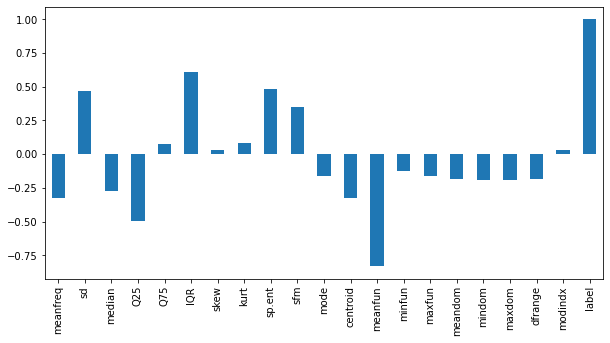

In [29]:
plt.figure(figsize=(10,5))
train_data.drop('Id',axis=1).corr()['label'].plot(kind='bar')

### Insights -  1) Label has highest negative coorealtion with meanfunc, followed Q25 2) Highest postive coorealtion with IQR and sd, sp.ent


In [33]:
train_data.columns

Index(['Id', 'meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

<AxesSubplot:xlabel='label', ylabel='modindx'>

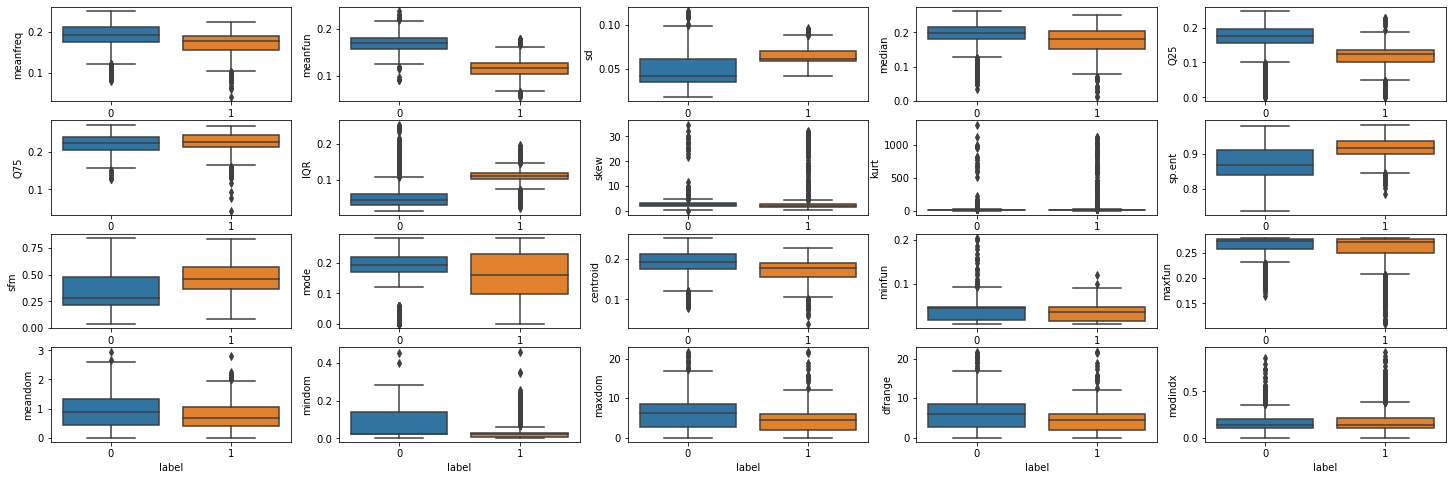

In [44]:
f,axes = plt.subplots(4,5,figsize=(25,8))
sns.boxplot(data=train_data,x='label',y='meanfreq', ax=axes[0,0])
sns.boxplot(data=train_data,x='label',y='meanfun', ax=axes[0,1])
sns.boxplot(data=train_data,x='label',y='sd', ax=axes[0,2])
sns.boxplot(data=train_data,x='label',y='median', ax=axes[0,3])
sns.boxplot(data=train_data,x='label',y='Q25', ax=axes[0,4])
sns.boxplot(data=train_data,x='label',y='Q75', ax=axes[1,0])
sns.boxplot(data=train_data,x='label',y='IQR', ax=axes[1,1])
sns.boxplot(data=train_data,x='label',y='skew', ax=axes[1,2])
sns.boxplot(data=train_data,x='label',y='kurt', ax=axes[1,3])
sns.boxplot(data=train_data,x='label',y='sp.ent', ax=axes[1,4])
sns.boxplot(data=train_data,x='label',y='sfm', ax=axes[2,0])
sns.boxplot(data=train_data,x='label',y='mode', ax=axes[2,1])
sns.boxplot(data=train_data,x='label',y='centroid', ax=axes[2,2])
sns.boxplot(data=train_data,x='label',y='minfun', ax=axes[2,3])
sns.boxplot(data=train_data,x='label',y='maxfun', ax=axes[2,4])
sns.boxplot(data=train_data,x='label',y='meandom', ax=axes[3,0])
sns.boxplot(data=train_data,x='label',y='mindom', ax=axes[3,1])
sns.boxplot(data=train_data,x='label',y='maxdom', ax=axes[3,2])
sns.boxplot(data=train_data,x='label',y='dfrange', ax=axes[3,3])
sns.boxplot(data=train_data,x='label',y='modindx', ax=axes[3,4])


####  Insights - 1) MeanFreq - Male is comparatively higher than Female 2) MeanFunc - Women is again comparatively very lower 3) SD- Higher in women and normally distributed 4) median - almost the same for both male and female 5) Q25 - Higher in Men 6) Q75 - Almost the same 7) IQR - Lower in Male and has outliers 8) sp.ent - Higher in women and normally distributed 9)sfm - Higher in Women and normally distributed 10) mode - Males are almost normally distributed compared to women 11) centroid -  Male is higher compared to women

# Data preprocessing for Developing Models

In [95]:
# Splitting data in to X and y
X=train_data.drop(['Id','label'],axis=1)
y=train_data['label']

In [96]:
#Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(2280, 20) (2280,) (571, 20) (571,)


In [97]:
# Scaling the Data
'''SS= StandardScaler()
X_train[X_train.columns]= SS.fit_transform(X_train)
X_test[X_test.columns]= SS.fit_transform(X_test)
X_test.head()'''
SS= RobustScaler()
X_train[X_train.columns]= SS.fit_transform(X_train)
X_test[X_test.columns]= SS.fit_transform(X_test)
X_test.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
2613,-0.023643,-0.500617,-0.350803,0.269867,-0.178311,-0.451726,0.104665,0.081184,-0.274040,-0.139948,-0.282473,-0.023643,0.248730,0.086777,0.180919,0.729410,0.0,0.399381,0.395743,0.156759
2389,0.170464,-0.097565,0.314884,-0.119174,0.276730,0.108485,-0.692342,-0.493617,0.131543,-0.232674,0.109000,0.170464,-0.528552,0.080253,-0.288204,-0.453247,0.0,-0.636223,-0.630429,-0.548021
2399,-1.688436,0.701949,-1.895792,-1.184604,-1.327320,0.302144,1.284815,3.876222,0.908680,1.242793,-1.253906,-1.688436,-0.981066,-1.001949,-0.058943,0.211605,-0.2,-0.034056,-0.030678,1.088303
1057,0.255800,-0.694704,0.105111,0.606137,-0.158747,-0.741760,-0.046152,-0.067734,-0.409489,-0.287992,0.023788,0.255800,0.670510,0.245032,-0.174855,0.420113,2.1,0.078947,0.046017,-0.202197
1923,0.084857,-0.636250,-0.262425,0.400605,-0.652778,-0.791221,0.231699,0.128908,-0.485874,-0.483910,0.012162,0.084857,0.492641,0.039099,0.119919,0.630915,0.0,0.520124,0.515387,-0.539479


In [98]:
selector = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1))
selector.fit(X_train,y_train)
selector_feat=X_train.columns[selector.get_support()].to_list()
print(selector_feat)
print(np.round(selector.threshold_,decimals=2))

['sd', 'Q25', 'IQR', 'meanfun']
0.05


In [99]:
X_train1 = X_train[selector_feat]
X_test1 = X_test[selector_feat]
print(X_train1.shape,X_test1.shape)

(2280, 4) (571, 4)


## 1 - Logistic Regression

In [100]:
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)
pred_values_train = LogReg.predict(X_train)
pred_values_test = LogReg.predict(X_test)
print(accuracy_score(y_train,pred_values_train))
print(accuracy_score(y_test,pred_values_test))
print(f1_score(y_train,pred_values_train))
print(f1_score(y_test,pred_values_test))
#print(classification_report(y_train,pred_values_train))
#print(classification_report(y_test,pred_values_test))

0.9728070175438597
0.9754816112084063
0.9727831431079894
0.975609756097561


## 2 - DecisionTree Classifier

In [101]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
pred_values_train = DT.predict(X_train)
pred_values_test = DT.predict(X_test)
print(accuracy_score(y_train,pred_values_train))
print(accuracy_score(y_test,pred_values_test))
print(f1_score(y_train,pred_values_train))
print(f1_score(y_test,pred_values_test))
#print(classification_report(y_train,pred_values_train))
#print(classification_report(y_test,pred_values_test))

1.0
0.957968476357268
1.0
0.9578947368421052


## 3 - Random Forest Classifier

In [102]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
pred_values_train = RF.predict(X_train)
pred_values_test = RF.predict(X_test)
print(accuracy_score(y_train,pred_values_train))
print(accuracy_score(y_test,pred_values_test))
print(f1_score(y_train,pred_values_train))
print(f1_score(y_test,pred_values_test))
#print(classification_report(y_train,pred_values_train))
#print(classification_report(y_test,pred_values_test))

1.0
0.9772329246935202
1.0
0.9769911504424779


## 4 - Naive Bayes Classifier

In [103]:
NB = GaussianNB()
NB.fit(X_train,y_train)
pred_values_train = NB.predict(X_train)
pred_values_test = NB.predict(X_test)
print(accuracy_score(y_train,pred_values_train))
print(accuracy_score(y_test,pred_values_test))
print(f1_score(y_train,pred_values_train))
print(f1_score(y_test,pred_values_test))
#print(classification_report(y_train,pred_values_train))
#print(classification_report(y_test,pred_values_test))

0.8982456140350877
0.8931698774080561
0.8983347940403156
0.8935427574171031


# Building the Test Data

In [104]:
test_data1 = test_data.copy()

In [105]:
test_data1.drop(['Id'],axis=1,inplace=True)

In [106]:
test_data1[test_data1.columns] = SS.transform(test_data1)

In [107]:
pred_values_test1 = RF.predict(test_data1)

In [111]:
FinalOp = pd.DataFrame(test_data['Id'])

In [112]:
FinalOp['label'] = pred_values_test1

In [114]:
FinalOp.to_csv('submission.csv',index=False,header=False)